# Estudo e explora√ß√£o dos dados para o Tech Challenge

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
import numpy as np
from datetime import datetime
from cycler import cycler

In [2]:
#O arquivo t√° com as colunas separadas por tabula√ß√£o, separador √© '\t'
vinhos_inicial = pd.read_csv('vinhoexp.csv', sep='\t', thousands='.', decimal=',')

vinhos_inicial.drop(columns=['Id'], inplace=True)

#o df tem duas colunas para cada ano, sendo elas 'quantidade (Kg)' e 'Valor (US$)'
#primeiro passo agora √©: corrigir os nomes das colunas, alternando entre Quantidade e Valor (US$)

colunas_atuais = vinhos_inicial.columns[1:]  #ignorando a coluna dos pa√≠ses
novas_colunas = []

for i, col in enumerate(colunas_atuais):

    tipo = 'Quantidade' if i % 2 == 0 else 'Valor'

    novas_colunas.append(f'{tipo}_{col}')

vinhos_inicial.columns = ['Pa√≠s'] + novas_colunas


#separando colunas de quantidade e valor
quantidade_cols = [col for col in vinhos_inicial.columns if col.startswith('Quantidade')]
valor_cols = [col for col in vinhos_inicial.columns if col.startswith('Valor')]


#vou fazer a tabela ficar no formato "longo", com uma coluna para ano, quantidade e valor. Acredito que esse formato vai ser o ideal para trabalhar com os dados depois.
#Para isso, vou usar a fun√ß√£o melt do pandas!!

df_qtd = vinhos_inicial.melt(id_vars='Pa√≠s', value_vars=quantidade_cols, var_name='Ano', value_name='Quantidade_L')
df_valor = vinhos_inicial.melt(id_vars='Pa√≠s', value_vars=valor_cols, var_name='Ano', value_name='Valor_USD')


#agora, √© extrair o ano da coluna (limpar)

df_qtd['Ano'] = df_qtd['Ano'].str.extract(r'(\d+)', expand=False)
df_valor['Ano'] = df_valor['Ano'].str.extract(r'(\d+)', expand=False)


#por fim, tenho que juntar os dois dataframes e depois ajustar os tipos pra ficar certinho

vinhos = pd.merge(df_qtd, df_valor, on=['Pa√≠s', 'Ano']) #juntando com a base nas colunas ano e pa√≠s :)

vinhos['Ano'] = vinhos['Ano'].astype(int)

vinhos['Quantidade_L'] = pd.to_numeric(vinhos['Quantidade_L'], errors='coerce').fillna(0) #o .fillna(0) substitui os valores inexistentes por zero, pra garantir que ta tudo bonitinho e certinho pra n dar problema no futuro

vinhos['Valor_USD'] = pd.to_numeric(vinhos['Valor_USD'], errors='coerce').fillna(0)


vinhos




Pa√≠s   Ano  Quantidade_L  Valor_USD
0                         Afeganist√£o  1970             0          0
1                       √Åfrica do Sul  1970             0          0
2     Alemanha, Rep√∫blica Democr√°tica  1970             0          0
3                              Angola  1970             0          0
4                            Anguilla  1970             0          0
...                               ...   ...           ...        ...
7750                           Tuvalu  2024             0          0
7751                          Uruguai  2024         36729      62325
7752                          Vanuatu  2024             0          0
7753                        Venezuela  2024        122922     199418
7754                           Vietn√£  2024            16         41

[7755 rows x 4 columns]

In [3]:
#Pr√≥ximo passo: Filtrar os dados para 2010 at√© 2024!

vinhos = vinhos[(vinhos['Ano'] >= 2010) & (vinhos['Ano'] <= 2024)]

vinhos

Pa√≠s   Ano  Quantidade_L  Valor_USD
5640                      Afeganist√£o  2010             0          0
5641                    √Åfrica do Sul  2010             0          0
5642  Alemanha, Rep√∫blica Democr√°tica  2010         27715     138666
5643                           Angola  2010         33557     189891
5644                         Anguilla  2010             0          0
...                               ...   ...           ...        ...
7750                           Tuvalu  2024             0          0
7751                          Uruguai  2024         36729      62325
7752                          Vanuatu  2024             0          0
7753                        Venezuela  2024        122922     199418
7754                           Vietn√£  2024            16         41

[2115 rows x 4 columns]

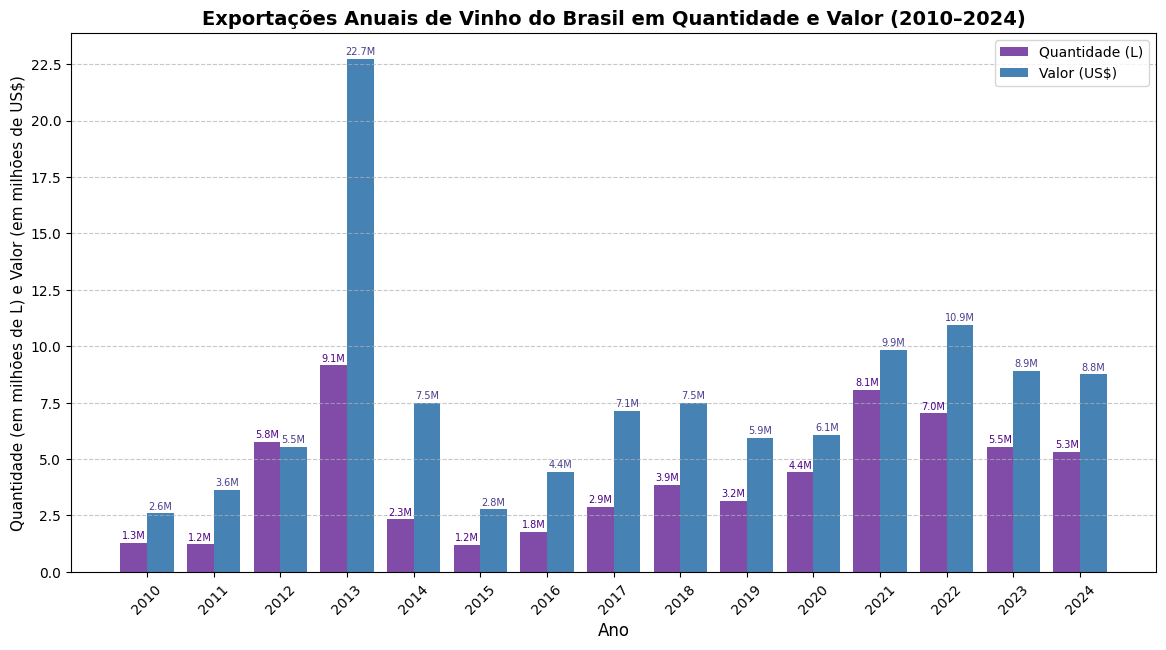

In [4]:
#Agora, vou fazer um gr√°fico de barras com as exporta√ß√µes (em qtd e valor) por ano

#primeiro, soma a quantidade total e valor total por ano
vinhos_soma = vinhos.groupby('Ano')[['Quantidade_L', 'Valor_USD']].sum().reset_index()


largura = 0.4
anos = vinhos_soma['Ano']
x = np.arange(len(anos))

fig, ax = plt.subplots(figsize=(14, 7))

ax.bar(x - largura/2, vinhos_soma['Quantidade_L'], width=largura, label='Quantidade (L)', color='indigo', alpha = 0.7)
ax.bar(x + largura/2, vinhos_soma['Valor_USD'], width=largura, label='Valor (US$)', color='steelblue', alpha = 1) #gostei da paleta de cores, ficou bem equilibrado :)


ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Quantidade (em milh√µes de L) e Valor (em milh√µes de US$)', fontsize=11)
ax.set_title('Exporta√ß√µes Anuais de Vinho do Brasil em Quantidade e Valor (2010‚Äì2024)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(anos, rotation=45)
ax.legend(loc='upper right', frameon=True)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:,.1f}')) #dividindo os dados (n√£o os do df) por 1 milh√£o pra melhorar a visualiza√ß√£o	
ax.yaxis.set_major_locator(MultipleLocator(2.5e6))  #ticks a cada 2.5 milh√µes


#adicionando os valores acima das barras
for i in range(len(anos)):
    ax.text(x[i] - largura/2, vinhos_soma['Quantidade_L'][i] + 0.1e6, f'{vinhos_soma["Quantidade_L"][i]/1e6:.1f}M', ha='center', va='bottom', fontsize=7, color='indigo')
    
    ax.text(x[i] + largura/2, vinhos_soma['Valor_USD'][i] + 0.1e6, f'{vinhos_soma["Valor_USD"][i]/1e6:.1f}M', ha='center', va='bottom', fontsize=7, color='darkslateblue')


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


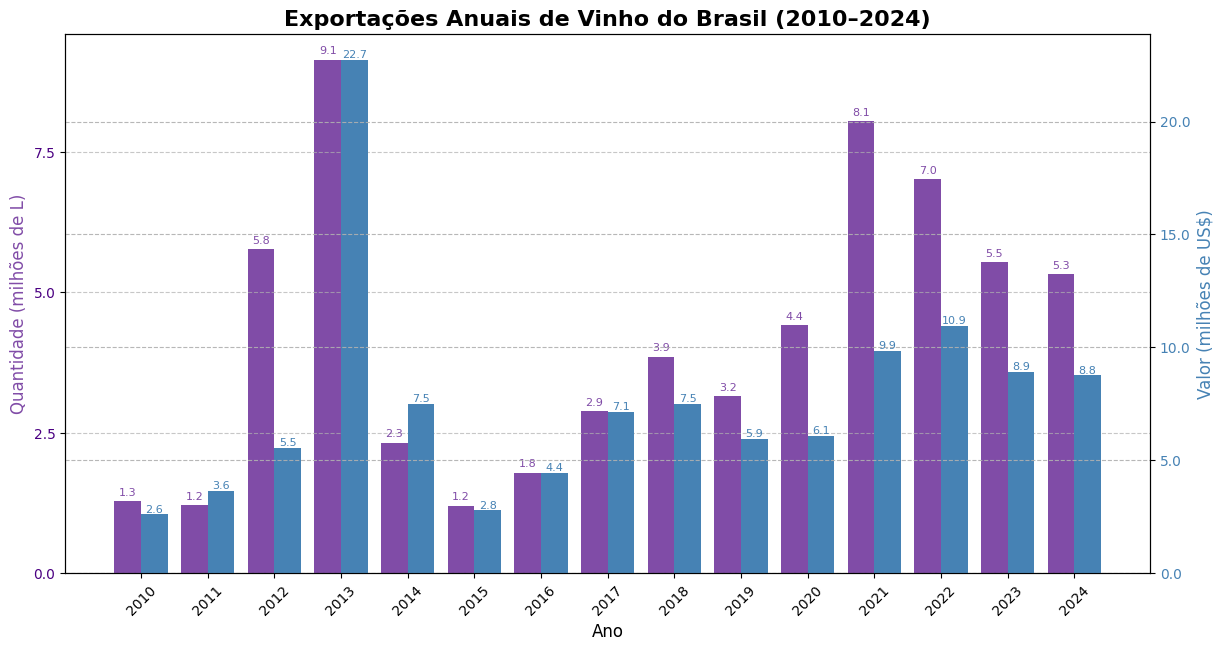

In [5]:
#agora fazendo um gr√°fico com dois eixos Y, para ver se ele fica mais claro do que o outro ou n√£o

largura = 0.4
anos = vinhos_soma['Ano']
x = np.arange(len(anos))

fig, ax1 = plt.subplots(figsize=(14, 7))

#primeiro eixo (esquerda) - Quantidade
barras1 = ax1.bar(x - largura/2, vinhos_soma['Quantidade_L'], width=largura, color='indigo', alpha = 0.7, label='Quantidade (L)')
ax1.set_ylabel('Quantidade (milh√µes de L)', fontsize=12, color='indigo', alpha = 0.7)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}'))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2.5e6))
ax1.tick_params(axis='y', labelcolor='indigo')

#segundo eixo (direita) - Valor
ax2 = ax1.twinx()
barras2 = ax2.bar(x + largura/2, vinhos_soma['Valor_USD'], width=largura, color='steelblue', label='Valor (US$)')
ax2.set_ylabel('Valor (milh√µes de US$)', fontsize=12, color='steelblue')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}'))
ax2.tick_params(axis='y', labelcolor='steelblue')

#r√≥tulos, t√≠tulo e etc
ax1.set_xlabel('Ano', fontsize=12)
ax1.set_title('Exporta√ß√µes Anuais de Vinho do Brasil (2010‚Äì2024)', fontsize=16, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(anos, rotation=45)

#adicionar valores sobre as barras
for i in range(len(anos)):
    ax1.text(x[i] - largura/2, vinhos_soma['Quantidade_L'][i] + 0.1e6, f'{vinhos_soma["Quantidade_L"][i]/1e6:.1f}', ha='center', fontsize=8, color='indigo', alpha = 0.7)
    ax2.text(x[i] + largura/2, vinhos_soma['Valor_USD'][i] + 0.1e6, f'{vinhos_soma["Valor_USD"][i]/1e6:.1f}', ha='center', fontsize=8, color='steelblue')

#grids nos dois eixos? continua esquisito 
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.9)

plt.show()

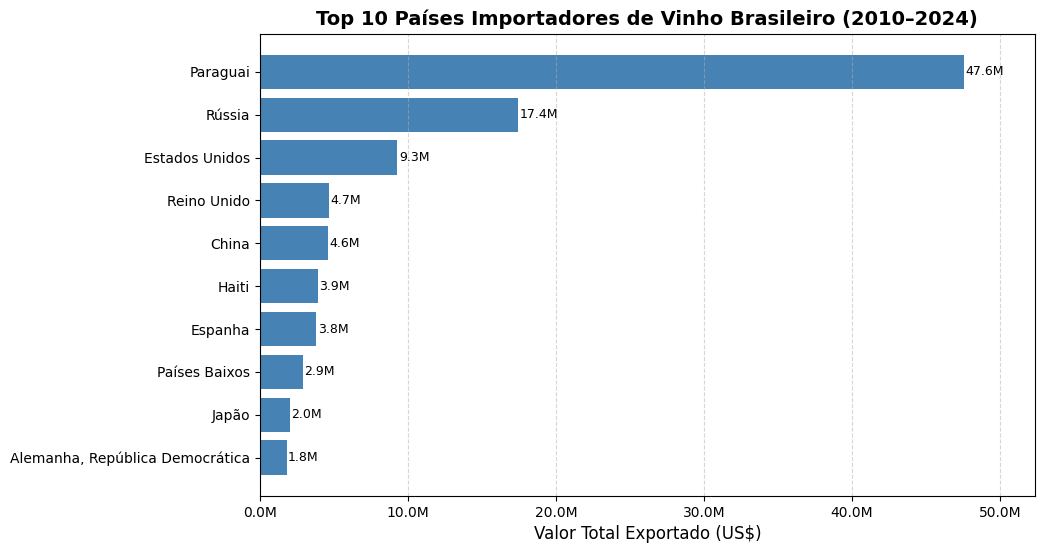

In [6]:
#conclus√£o: acho que ficou uma bosta o gr√°fico com dois eixos. Ficou super confuso, apesar de mais verticalmente equilibrado. DESCARTADO!
#pr√≥xima tentativa: gr√°fico por pa√≠s (top 5 ou top 10?)
#escolher qual abordagem usar: ranking total acumulado; ano mais recente; evolu√ß√£o ano a ano por pa√≠s etc. (talvez todas?)

#come√ßando por ranking total acumulado:

ranking_paises = vinhos.groupby('Pa√≠s')['Valor_USD'].sum().sort_values(ascending=False).head(10)  #agrupa e soma valor total por pa√≠s

#Vou fazer um gr√°fico de barras horizontais, acho que √© o que mais combina com um ranking
fig, ax = plt.subplots(figsize=(10, 6))
ranking_paises = ranking_paises.sort_values()  # ordena de baixo para cima no gr√°fico
bars = ax.barh(ranking_paises.index, ranking_paises.values, color='steelblue')

#adicionando r√≥tulos nas barras
for bar in bars:
    width = bar.get_width()
    ax.text(width + 1e5, bar.get_y() + bar.get_height()/2, f'{width/1e6:.1f}M', va='center', fontsize=9)

ax.set_xlabel('Valor Total Exportado (US$)', fontsize=12)
ax.set_title('Top 10 Pa√≠ses Importadores de Vinho Brasileiro (2010‚Äì2024)', fontsize=14, fontweight='bold')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
ax.grid(axis='x', linestyle='--', alpha=0.5)
ax.set_xlim(0, ranking_paises.max() * 1.1)  # adiciona um pouco de espa√ßo √† direita do gr√°fico

plt.show()


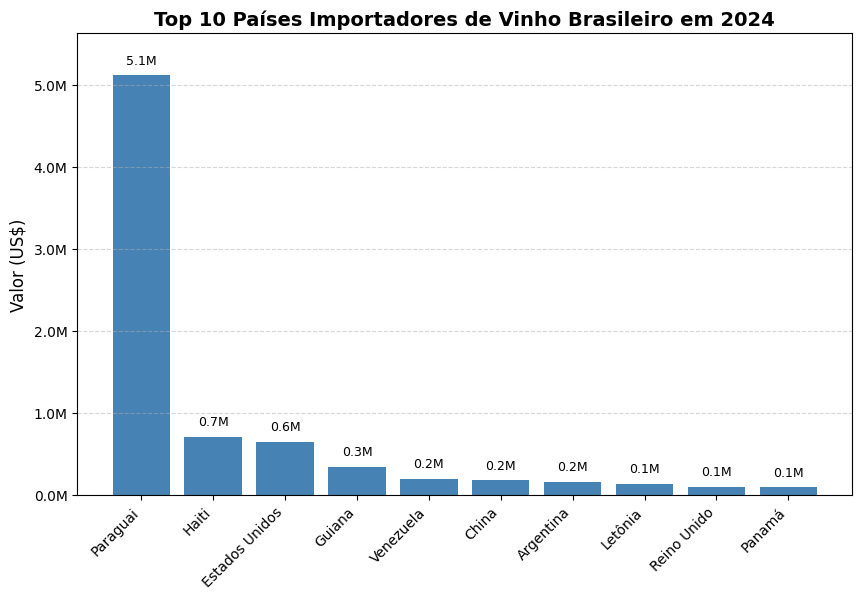

In [7]:
#Limita√ß√£o: n√£o mostra se est√£o crescendo ou caindo
#bom para mostrar os "campe√µes" de longo prazo

#pr√≥ximo gr√°fico √©: os top pa√≠ses em 2024 (podendo escolher o ano que quiser hehe)

ano_escolhido = 2024
vinhos_ano = vinhos[vinhos['Ano'] == ano_escolhido]
ranking_ano = vinhos_ano.groupby('Pa√≠s')['Valor_USD'].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(ranking_ano.index, ranking_ano.values, color='steelblue')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1e5, f'{height/1e6:.1f}M', ha='center', va='bottom', fontsize=9)

ax.set_ylabel('Valor (US$)', fontsize=12)
ax.set_title(f'Top 10 Pa√≠ses Importadores de Vinho Brasileiro em {ano_escolhido}', fontsize=14, fontweight='bold')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

ax.set_xticks(range(len(ranking_ano)))
ax.set_xticklabels(ranking_ano.index, rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_ylim(0, ranking_ano.max() * 1.1) #pra ajustar o limite do eixo y, deixando um espa√ßo em cima das barras, de acordo com o valor m√°ximo

plt.show()


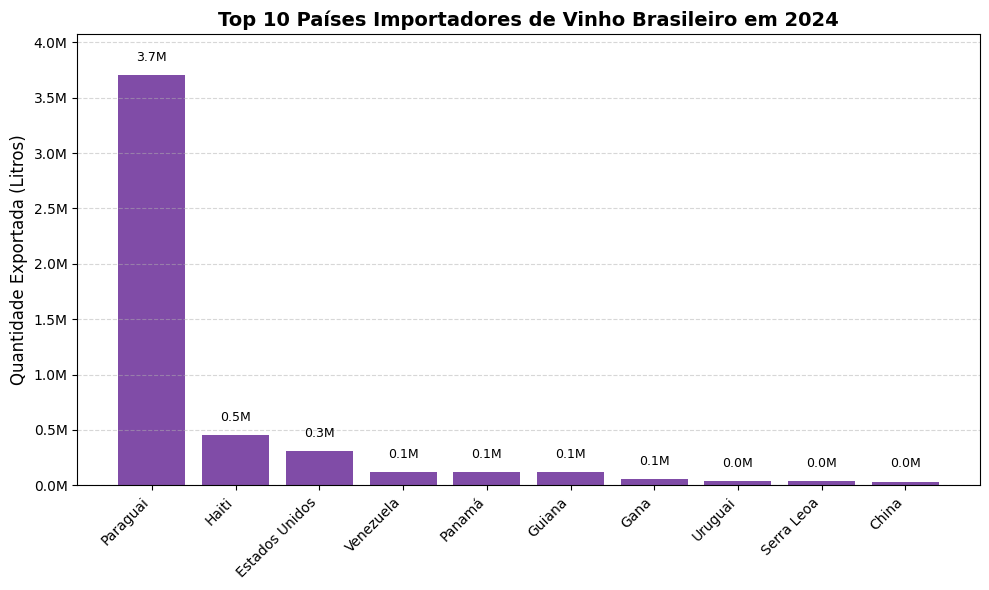

In [8]:
#quero fazer tamb√©m um igual a esse s√≥ que com a quantidade em litros tamb√©m 
#pode n√£o ser muito relevante, mas acho que √© v√°lido ter ele :)


ranking_ano = vinhos_ano.groupby('Pa√≠s')['Quantidade_L'].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(ranking_ano.index, ranking_ano.values, color='indigo', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1e5, f'{height/1e6:.1f}M', ha='center', va='bottom', fontsize=9)

ax.set_ylabel(f'Quantidade Exportada (Litros)', fontsize=12)
ax.set_title(f'Top 10 Pa√≠ses Importadores de Vinho Brasileiro em {ano_escolhido}', fontsize=14, fontweight='bold')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

ax.set_xticks(range(len(ranking_ano)))
ax.set_xticklabels(ranking_ano.index, rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_ylim(0, ranking_ano.max() * 1.1)

plt.tight_layout()
plt.show()

In [9]:
#o foda nesses dois gr√°ficos √© que o paraguai, por exemplo, tem um valor muuuuuuuito mais alto entao as outras 
#barras quando vai chegando no final do ranking ficam min√∫sculas e n√£o da pra ver nem fazer nenhuma compara√ß√£o entre elas..

#o que d√° pra fazer, caso a gente siga com esses gr√°ficos no relat√≥rio final, √© talvez excluir os primeiros 3 pa√≠ses ou algo assim do ranking
#pq ai fica vis√≠vel o que que rola com o restante dos pa√≠ses!!

#uma an√°lise legal que d√° pra fazer √© comparar esse gr√°fico com o gr√°fico de valor, que a√≠ mostra quem ta importando 
#vinho mais barato ou caro//quem t√° pagando mais caro ou barato por litro
#falando nisso, vou fazer um gr√°fico valor por litro entre os pa√≠ses agora :)


#Seguindo adiante ent√£o:

#primeiro passo √© fazer uma nova coluna no df com o pre√ßo por litro:
#LEMBRANDO que pode ter a quantidade 0 frequentemente, ent√£o tem que se preparar pra esses casos:


#vinhos['Preco_Litro'] = vinhos.apply(lambda row: row['Valor_USD'] / row['Quantidade_L'] if row['Quantidade_L'] > 0 else 0, axis=1)


#explica√ß√£o do que que √© esse lambda e como funciona isso aqui:

#lambda √© uma forma abreviada de criar uma fun√ß√£o simples e r√°pida. √â o mesmo que def, s√≥ que inline (sem nome) -> em def seria def nome_funcao(etc)
#aqui, row √© uma linha do dataframe, passada linha por linha pela fun√ß√£o apply() do pandas
#vinhos.apply(lambda row: row['Valor_USD'] / row['Quantidade_L'], axis=1) significa: 
# ‚ÄúPara cada linha (row) do dataframe pegue o Valor_USD e divida pelo Quantidade_L e retorne esse valor como o pre√ßo por litro.‚Äù


vinhos.loc[:, 'Preco_Litro'] = vinhos.apply(lambda row: row['Valor_USD'] / row['Quantidade_L'] if row['Quantidade_L'] > 0 else 0, axis=1)

#tive que usar o .loc tal para mostrar pro pandas que eu tava querendo editar a coluna toda do dataframe original, e n√£o s√≥ uma c√≥pia dela 
# (porque antes eu fiz vinhos = vinhos[(vinhos['Ano'] >= 2010) & (vinhos['Ano'] <= 2024)], l√° em cima!) a√≠ ele me mostra um warning pra confirmar isso. Agora t√° certinho!

vinhos


C:\Users\supra\AppData\Local\Temp\ipykernel_7236\3127303753.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vinhos.loc[:, 'Preco_Litro'] = vinhos.apply(lambda row: row['Valor_USD'] / row['Quantidade_L'] if row['Quantidade_L'] > 0 else 0, axis=1)


Pa√≠s   Ano  Quantidade_L  Valor_USD  \
5640                      Afeganist√£o  2010             0          0   
5641                    √Åfrica do Sul  2010             0          0   
5642  Alemanha, Rep√∫blica Democr√°tica  2010         27715     138666   
5643                           Angola  2010         33557     189891   
5644                         Anguilla  2010             0          0   
...                               ...   ...           ...        ...   
7750                           Tuvalu  2024             0          0   
7751                          Uruguai  2024         36729      62325   
7752                          Vanuatu  2024             0          0   
7753                        Venezuela  2024        122922     199418   
7754                           Vietn√£  2024            16         41   

      Preco_Litro  
5640     0.000000  
5641     0.000000  
5642     5.003283  
5643     5.658760  
5644     0.000000  
...           ...  
7750     0.000000  
7751     1.696888  
7752     0.000000  
7753     1.622313  
7754     2.562500  

[2115 rows x 5 columns]

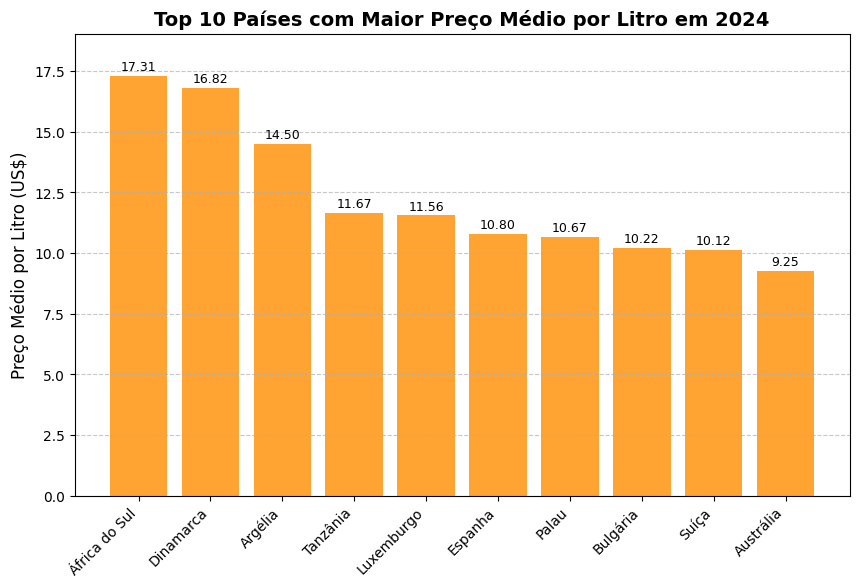

In [10]:
#Agora sim, fazendo o gr√°fico!

vinhos_ano = vinhos[vinhos['Ano'] == ano_escolhido] #tive que definir dnv pq eu mudei o df n√© ent√£o ele ainda n tava atualizado com a coluna nova
ranking_preco = vinhos_ano.groupby('Pa√≠s')['Preco_Litro'].mean().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(ranking_preco.index, ranking_preco.values, color='darkorange', alpha=0.8)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.1, f'{height:.2f}', ha='center', va='bottom', fontsize=9)

ax.set_ylabel('Pre√ßo M√©dio por Litro (US$)', fontsize=12)
ax.set_title(f'Top 10 Pa√≠ses com Maior Pre√ßo M√©dio por Litro em {ano_escolhido}', fontsize=14, fontweight='bold')
ax.set_xticks(range(len(ranking_preco)))
ax.set_xticklabels(ranking_preco.index, rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_ylim(0, ranking_preco.max() * 1.1)

plt.show()

In [11]:
#esse gr√°fico √© bom pra:
#mostrar onde est√£o os mercados de maior valor agregado
#discutir estrat√©gias de exporta√ß√£o premium
#propor a√ß√µes de segmenta√ß√£o geogr√°fica e de produto
#etc e tal

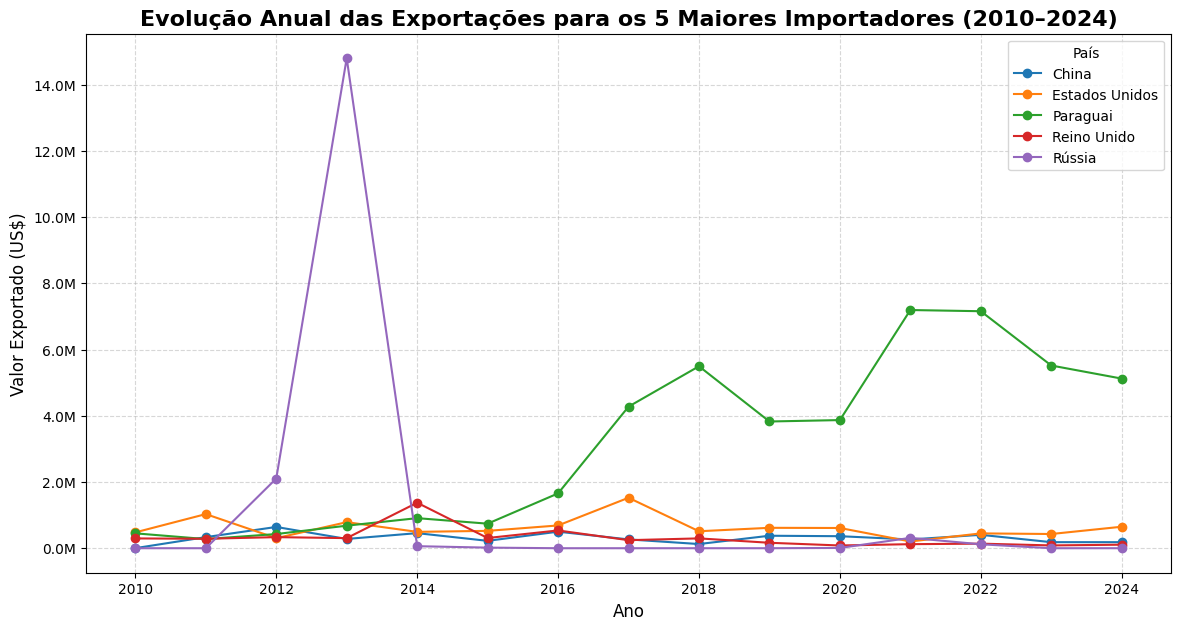

In [12]:
#agora vamos para o gr√°fico de evolu√ß√£o ano a ano por pa√≠s (considerando apenas os top 5 pa√≠ses totais no per√≠odo)

top5_paises = vinhos.groupby('Pa√≠s')['Valor_USD'].sum().sort_values(ascending=False).head(5).index
vinhos_top5 = vinhos[vinhos['Pa√≠s'].isin(top5_paises)]
evolucao_top5 = vinhos_top5.groupby(['Ano', 'Pa√≠s'])['Valor_USD'].sum().unstack()

fig, ax = plt.subplots(figsize=(14, 7))
evolucao_top5.plot(ax=ax, marker='o')

ax.set_title('Evolu√ß√£o Anual das Exporta√ß√µes para os 5 Maiores Importadores (2010‚Äì2024)', fontsize=16, fontweight='bold')
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Valor Exportado (US$)', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
ax.grid(axis='both', linestyle='--', alpha=0.5)
ax.legend(title='Pa√≠s')

plt.show()

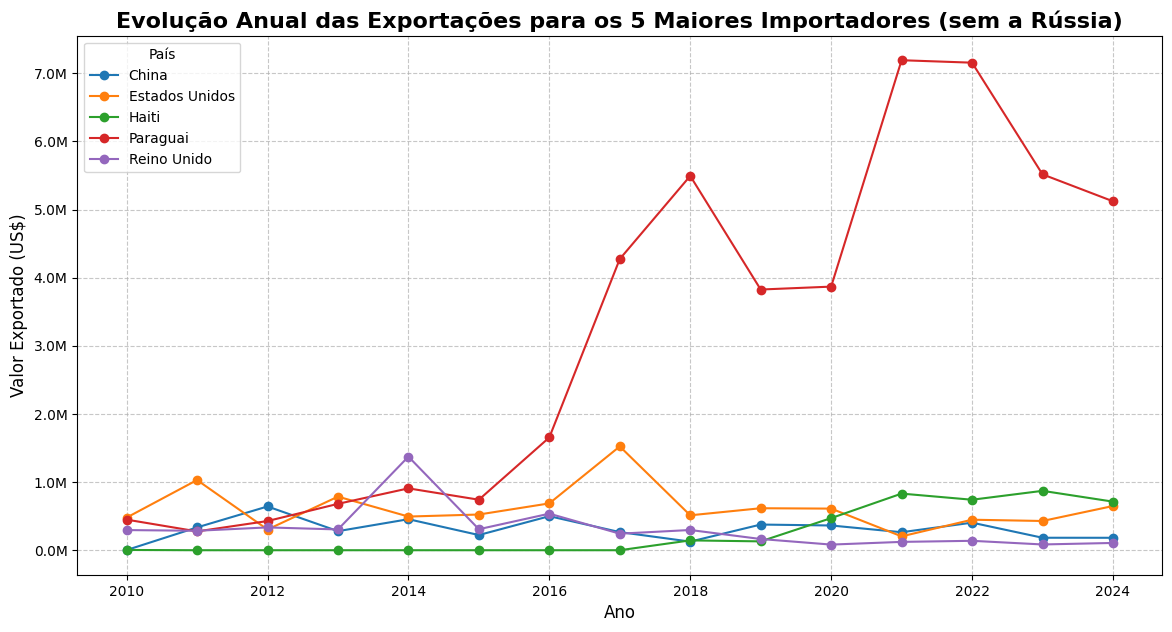

In [13]:
#esse pico escroto da russia ta atrapalhando a visualiza√ß√£o, podemos fazer um gr√°fico excluindo ela e pegando o proximo pais no top 5

ranking_geral = vinhos.groupby('Pa√≠s')['Valor_USD'].sum().sort_values(ascending=False)
top5_sem_russia = ranking_geral[ranking_geral.index != 'R√∫ssia'].head(5).index

vinhos_top5_alt = vinhos[vinhos['Pa√≠s'].isin(top5_sem_russia)]

evolucao_top5_alt = vinhos_top5_alt.groupby(['Ano', 'Pa√≠s'])['Valor_USD'].sum().unstack()

fig, ax = plt.subplots(figsize=(14, 7))
evolucao_top5_alt.plot(ax=ax, marker='o')

ax.set_title('Evolu√ß√£o Anual das Exporta√ß√µes para os 5 Maiores Importadores (sem a R√∫ssia)', fontsize=16, fontweight='bold')
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Valor Exportado (US$)', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
ax.grid(axis='both', linestyle='--', alpha=0.7)
ax.legend(title='Pa√≠s')

plt.show()



In [14]:
#o bom desse gr√°fico √© que ele mostra tend√™ncia por pa√≠s, n√£o s√≥ quem comprou mais (olhando diretamente para a r√∫ssia üëÄ)
#paraguai t√° fort√≠ssimo nos ultimos anos!

#outra coisa que d√° pra fazer √© pegar o top pa√≠ses que importaram num per√≠odo espec√≠fico (tipo 2010 at√© 2015 por exemplo) e refazer esse gr√°fico. 
#pode ser que tenha algum(ns) pa√≠ses que importavam muito antes e diminu√≠ram recentemente. 
#por ex o Haiti, que importava pouquissimo antes de 2018 e come√ßou a importar tanto que virou o top 6..


In [15]:
#acho que agora chega de fazer gr√°ficos desse df especificamente por enquanto. Vou tratar os dados clim√°ticos agora e depois vamos ver o que d√° pra fazer de correla√ß√µes e an√°lises :)


Parte Clim√°tica

In [16]:
#Depois de muita luta, escolhi quais vao ser as esta√ß√µes ideais para usar (documentado no docs)! S√£o elas: 
#Bento Gon√ßalves (A840) (principal!), Santana do Livramento (A804) e Vacaria (A880)

#ler os dados:

bento = pd.read_csv('BentoGoncalves.csv', sep=";", skiprows=10, encoding="latin1", decimal=",")
#livramento = pd.read_csv('SantanaDoLivramento.csv', sep=";", skiprows=10, encoding="latin1", decimal=",")
bage = pd.read_csv('Bage.csv', sep=";", skiprows=10, encoding="latin1", decimal=",")
vacaria = pd.read_csv('Vacaria.csv', sep=";", skiprows=10, encoding="latin1", decimal=",")



#adicionando coluna com nome da esta√ß√£o
bento["Estacao"] = "Bento Gon√ßalves"
#livramento["Estacao"] = "Santana do Livramento"
bage["Estacao"] = "Bage"
vacaria["Estacao"] = "Vacaria"

#juntando em um √∫nico dataframe
clima = pd.concat([bento, bage, vacaria], ignore_index=True)

clima
#tem v√°rios buracos nos dados......... :/ 
#Tenho a op√ß√£o de tentar procurar outras esta√ß√µes pra verse elas t√£o completas, mas no momento t√¥ com pregui√ßa 
#acho que vou ver se preencho os buracos com as m√©dias por enquanto pra ver se fica OK, mas isso pode enviesar os dados... tanto pra baixo quanto pra cima

#pesando os pr√≥s e contras das rotas:
### Faltam poucos meses -- (‚â§ 15‚Äì20 % do total entre 2010-2024, sem grandes ‚Äúburacos‚Äù consecutivos na vindima ‚Äî jan-mar) -> vindima √© a colheita das uvas (per√≠odo mais relevante pra n√≥s talvez)
### se sim, manter as esta√ß√µes e imputar os dados

### Faltam muitos meses ou h√° lacunas longas em 2 + anos cr√≠ticos (tem que ver quais seriam esses)
### se sim, √© melhor trocar a esta√ß√£o com maior falta (por ex usar a esta√ß√£o Canela se Bento tivesse buracos demais) E imputar lacunas pequenas nas demais

#ent√£o tenho que verificar a % de dados faltantes por esta√ß√£o.. Vamos l√°!


Data Medicao  NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(n√É¬∫mero)  \
0     2010-01-31                                               18.0        
1     2010-02-28                                               14.0        
2     2010-03-31                                               19.0        
3     2010-04-30                                               14.0        
4     2010-05-31                                               21.0        
..           ...                                                ...        
535   2024-08-31                                               12.0        
536   2024-09-30                                               12.0        
537   2024-10-31                                               13.0        
538   2024-11-30                                               11.0        
539   2024-12-31                                               20.0        

     PRECIPITACAO TOTAL, MENSAL (AUT)(mm)  \
0                                   278.4   
1                                   161.4   
2                                    58.4   
3                                   136.4   
4                                   158.6   
..                                    ...   
535                                  88.2   
536                                 128.0   
537                                 195.0   
538                                  96.6   
539                                 187.0   

     PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)  \
0                                          941.5   
1                                          942.1   
2                                          942.6   
3                                          946.2   
4                                          946.0   
..                                           ...   
535                                        909.0   
536                                        906.6   
537                                        906.1   
538                                        904.9   
539                                        903.5   

     TEMPERATURA MEDIA, MENSAL (AUT)(√Ç¬∞C)  \
0                                    21.9   
1                                    23.0   
2                                    20.7   
3                                    17.6   
4                                    14.3   
..                                    ...   
535                                  12.8   
536                                  16.2   
537                                  16.5   
538                                  18.3   
539                                  17.9   

     VENTO, VELOCIDADE MAXIMA MENSAL (AUT)(m/s)  \
0                                           7.0   
1                                           9.7   
2                                           7.0   
3                                           8.5   
4                                           6.8   
..                                          ...   
535                                        10.3   
536                                        13.5   
537                                        11.2   
538                                         9.0   
539                                         9.9   

     VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)  Unnamed: 7          Estacao  
0                                          2.5         NaN  Bento Gon√ßalves  
1                                          2.8         NaN  Bento Gon√ßalves  
2                                          2.2         NaN  Bento Gon√ßalves  
3                                          2.4         NaN  Bento Gon√ßalves  
4                                          2.2         NaN  Bento Gon√ßalves  
..                                         ...         ...              ...  
535                                        3.7         NaN          Vacaria  
536                                        4.1         NaN          Vacaria  
537                                        3.9         NaN  

In [17]:
#Para que a fun√ß√£o falta_pct seja √∫til, preciso selecionar quais colunas v√£o ser usadas nas an√°lises. Ent√£o, vamos remover as que n√£o s√£o t√£o relevantes!
#Vou manter: frequ√™ncia de chuva(num. de dias c precip.), precipita√ß√£o total e temperatura m√©dia! A coluna esta√ß√£o e data v√£o ficar tamb√©m.

cols_manter = {
    'Data Medicao' : 'Data',   
    'NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(n√É¬∫mero)': 'DiasChuva',
    'PRECIPITACAO TOTAL, MENSAL (AUT)(mm)': 'PrecipTotal',
    'TEMPERATURA MEDIA, MENSAL (AUT)(√Ç¬∞C)': 'TempMedia',
    'Estacao': 'Estacao'          
}

#aproveitar e j√° renomear elas tbm

clima_sel = clima[list(cols_manter.keys())].rename(columns=cols_manter)

#converte a data para datetime e define como √≠ndice
clima_sel['Data'] = pd.to_datetime(clima_sel['Data'])  
clima_sel = clima_sel.set_index('Data')

clima_sel


#OK!


DiasChuva  PrecipTotal  TempMedia          Estacao
Data                                                          
2010-01-31       18.0        278.4       21.9  Bento Gon√ßalves
2010-02-28       14.0        161.4       23.0  Bento Gon√ßalves
2010-03-31       19.0         58.4       20.7  Bento Gon√ßalves
2010-04-30       14.0        136.4       17.6  Bento Gon√ßalves
2010-05-31       21.0        158.6       14.3  Bento Gon√ßalves
...               ...          ...        ...              ...
2024-08-31       12.0         88.2       12.8          Vacaria
2024-09-30       12.0        128.0       16.2          Vacaria
2024-10-31       13.0        195.0       16.5          Vacaria
2024-11-30       11.0         96.6       18.3          Vacaria
2024-12-31       20.0        187.0       17.9          Vacaria

[540 rows x 4 columns]

In [18]:
#criando um √≠ndice mensal completo

idx_full = pd.date_range('2010-01-01', '2024-12-31', freq='ME')


#definindo quais colunas clim√°ticas contam
clima_cols = ['TempMedia', 'PrecipTotal', 'DiasChuva']   #pra evitar que a coluna estacao entre na contagem de NaNs e atrapalhe


#fun√ß√£o pra contar os NaNs e calcular a porcentagem de dados faltantes
def falta_pct(df_est):
    df_alinh = df_est.reindex(idx_full)

    sub = df_alinh[clima_cols]          # s√≥ vari√°veis de interesse

    any_nan  = sub.isna().any(axis=1).sum()
    all_nan  = sub.isna().all(axis=1).sum()
    total    = len(idx_full)

    return pd.Series({
        '%‚â•1 NaN':   any_nan  / total * 100,
        '%Todos NaN': all_nan / total * 100
    })


faltas = (clima_sel.groupby('Estacao').apply(falta_pct, include_groups=False))
print(faltas)


                  %‚â•1 NaN  %Todos NaN
Estacao                              
Bage             7.777778    1.666667
Bento Gon√ßalves  7.222222    1.111111
Vacaria          8.333333    3.333333


In [19]:
#Com esse resultado, temos que bento e vacaria est√£o aceit√°veis, mas livramento tem muitos dados faltando. Ent√£o, vou trocar ela por Bag√©.
#Como eu s√≥ substitui a esta√ß√£o l√° em cima no c√≥digo, pra quem t√° vendo pela primeira vez vai parecer como se eu nunca nem tivesse usado Santana do Livramento hehe
#mas eu usei e ela tava uma merda!


#Escolha de esta√ß√µes t√° √≥tima. Vou inputar os dados faltantes agora.

for col in clima_cols:
    clima_sel[col] = (clima_sel.groupby(['Estacao', clima_sel.index.month])[col].transform(lambda s: s.fillna(s.mean())))

#esse for com essa fun√ß√£o lambda inputa os dados com base na media daquele mesmo mes na propria esta√ß√£o.


faltas = (clima_sel.groupby('Estacao').apply(falta_pct, include_groups=False))
print(faltas)

#Funcionando! Problema s√≥ que os valores ficam com um milhao de casas decimais 

clima_sel

                 %‚â•1 NaN  %Todos NaN
Estacao                             
Bage                 0.0         0.0
Bento Gon√ßalves      0.0         0.0
Vacaria              0.0         0.0


DiasChuva  PrecipTotal  TempMedia          Estacao
Data                                                          
2010-01-31       18.0        278.4       21.9  Bento Gon√ßalves
2010-02-28       14.0        161.4       23.0  Bento Gon√ßalves
2010-03-31       19.0         58.4       20.7  Bento Gon√ßalves
2010-04-30       14.0        136.4       17.6  Bento Gon√ßalves
2010-05-31       21.0        158.6       14.3  Bento Gon√ßalves
...               ...          ...        ...              ...
2024-08-31       12.0         88.2       12.8          Vacaria
2024-09-30       12.0        128.0       16.2          Vacaria
2024-10-31       13.0        195.0       16.5          Vacaria
2024-11-30       11.0         96.6       18.3          Vacaria
2024-12-31       20.0        187.0       17.9          Vacaria

[540 rows x 4 columns]

In [ ]:
#Agora vou agrupar anualmente. Importante notar que pra algumas an√°lises eu posso querer fazer um agrupamento anual especifico
#por exemplo: agrupar somente os meses de colheita das uvas no ano para ver se isso gera um resultado diferente nas analises, coisa e tal

clima_anualgeral = (clima_sel.groupby(['Estacao', clima_sel.index.year])
    .agg({'TempMedia':'mean', 'PrecipTotal':'sum', 'DiasChuva':'sum'})
    .reset_index()
    .rename(columns={'Data':'Ano'})
)

clima_anualgeral



Estacao   Ano  TempMedia  PrecipTotal   DiasChuva
0              Bage  2010  17.600000  1128.200000  137.000000
1              Bage  2011  17.525000   966.169231  115.000000
2              Bage  2012  18.416667  1257.600000  128.000000
3              Bage  2013  17.216667  1450.000000  149.000000
4              Bage  2014  18.125000  1897.224615  169.000000
5              Bage  2015  18.025000  1840.640000  171.000000
6              Bage  2016  18.038095  1513.809231  156.571429
7              Bage  2017  18.645238  1635.085714  143.000000
8              Bage  2018  18.158333  1392.914286  133.000000
9              Bage  2019  18.525000  1673.809231  149.000000
10             Bage  2020  18.241667  1088.440000  125.000000
11             Bage  2021  17.641667  1173.800000  156.000000
12             Bage  2022  17.483333  1398.584615  133.000000
13             Bage  2023  18.541667  1793.000000  147.000000
14             Bage  2024  18.266667  1878.000000  162.000000
15  Bento Gon√ßalves  2010  17.308333  1631.800000  169.000000
16  Bento Gon√ßalves  2011  17.116667  1731.692308  171.000000
17  Bento Gon√ßalves  2012  18.275000  1343.000000  114.000000
18  Bento Gon√ßalves  2013  17.058333  1853.600000  162.000000
19  Bento Gon√ßalves  2014  18.175000  2023.800000  175.000000
20  Bento Gon√ßalves  2015  17.710119  1684.679121  156.285714
21  Bento Gon√ßalves  2016  17.183333  1777.349451  134.000000
22  Bento Gon√ßalves  2017  18.266667  1894.707692  148.000000
23  Bento Gon√ßalves  2018  17.575000  1802.400000  156.000000
24  Bento Gon√ßalves  2019  17.992262  1374.169231  142.000000
25  Bento Gon√ßalves  2020  17.875000  1542.571429  127.000000
26  Bento Gon√ßalves  2021  17.408333  1298.400000  143.000000
27  Bento Gon√ßalves  2022  17.200000  1634.200000  180.000000
28  Bento Gon√ßalves  2023  18.216667  2020.469231  156.000000
29  Bento Gon√ßalves  2024  18.258333  2356.800000  181.000000
30          Vacaria  2010  15.183333  2055.800000  206.000000
31          Vacaria  2011  14.933333  1998.400000  212.000000
32          Vacaria  2012  15.811538  1510.430769  128.461538
33          Vacaria  2013  15.066667  1606.000000  169.000000
34          Vacaria  2014  16.058333  2285.000000  180.000000
35          Vacaria  2015  16.108333  2340.400000  194.000000
36          Vacaria  2016  15.084722  1647.683333  164.230769
37          Vacaria  2017  16.091667  1718.000000  184.000000
38          Vacaria  2018  15.658333  2015.200000  179.000000
39          Vacaria  2019  16.200000  1694.200000  168.000000
40          Vacaria  2020  15.874832  1906.098718  157.549451
41          Vacaria  2021  15.276389  1662.867949  144.000000
42          Vacaria  2022  15.050000  1898.400000  177.000000
43          Vacaria  2023  15.908333  1920.400000  160.928571
44          Vacaria  2024  16.391667  2155.000000  190.000000

In [21]:
#tem 3 estacoes, entao os anos tem que repetir 3x pra poder ter um representante de cada estacao no df


vinhos_rep  = vinhos.assign(key=1)
estacoes    = clima_anualgeral[['Estacao']].drop_duplicates().assign(key=1)
vinhos_long = pd.merge(vinhos_rep, estacoes, on='key').drop(columns='key')

#juntar clima por Ano + Estacao
vinhos_clima = pd.merge(
        clima_anualgeral,          # (Ano, Estacao, TempMedia, PrecipTotal‚Ä¶)
        vinhos_long,               # (Ano, Estacao, Quantidade_L, Valor_USD)
        on=['Ano','Estacao']
)



vinhos_clima


Estacao   Ano  TempMedia  PrecipTotal  DiasChuva  \
0        Bage  2010  17.600000       1128.2      137.0   
1        Bage  2010  17.600000       1128.2      137.0   
2        Bage  2010  17.600000       1128.2      137.0   
3        Bage  2010  17.600000       1128.2      137.0   
4        Bage  2010  17.600000       1128.2      137.0   
...       ...   ...        ...          ...        ...   
6340  Vacaria  2024  16.391667       2155.0      190.0   
6341  Vacaria  2024  16.391667       2155.0      190.0   
6342  Vacaria  2024  16.391667       2155.0      190.0   
6343  Vacaria  2024  16.391667       2155.0      190.0   
6344  Vacaria  2024  16.391667       2155.0      190.0   

                                 Pa√≠s  Quantidade_L  Valor_USD  Preco_Litro  
0                         Afeganist√£o             0          0     0.000000  
1                       √Åfrica do Sul             0          0     0.000000  
2     Alemanha, Rep√∫blica Democr√°tica         27715     138666     5.003283  
3                              Angola         33557     189891     5.658760  
4                            Anguilla             0          0     0.000000  
...                               ...           ...        ...          ...  
6340                           Tuvalu             0          0     0.000000  
6341                          Uruguai         36729      62325     1.696888  
6342                          Vanuatu             0          0     0.000000  
6343                        Venezuela        122922     199418     1.622313  
6344                           Vietn√£            16         41     2.562500  

[6345 rows x 9 columns]

In [22]:
print(vinhos_clima[clima_cols].isna().sum()) 
#verificando se tem algum dado faltante no geral

TempMedia      0
PrecipTotal    0
DiasChuva      0
dtype: int64


In [27]:
#gerando correla√ß√µes simples

corr = vinhos_clima[['Quantidade_L','Valor_USD','TempMedia','PrecipTotal','DiasChuva']].corr()
print(corr)


#n√£o acho que vai ser t√£o simples assim pra obter algum resultado relevante.
#de fato, as correla√ß√µes s√£o inexistentes. Preciso trabalhar mais em cima dos dados pra conseguir extrair algo relevante

              Quantidade_L  Valor_USD  TempMedia  PrecipTotal  DiasChuva
Quantidade_L      1.000000   0.922367  -0.003856    -0.010236  -0.012156
Valor_USD         0.922367   1.000000  -0.007619    -0.000170   0.000115
TempMedia        -0.003856  -0.007619   1.000000    -0.310529  -0.515767
PrecipTotal      -0.010236  -0.000170  -0.310529     1.000000   0.753982
DiasChuva        -0.012156   0.000115  -0.515767     0.753982   1.000000


In [ ]:
#testando para ver se tem diferen√ßa entre uma esta√ß√£o e outra:

for est in ['Bage','Bento Gon√ßalves','Vacaria']:
    df = vinhos_clima[vinhos_clima['Estacao'] == est]
    print(est, df[['Quantidade_L','TempMedia','PrecipTotal','DiasChuva']].corr()['Quantidade_L'])

#tem um pouco, mas continua n√£o correlacionado.

Bage Quantidade_L    1.000000
TempMedia      -0.015686
PrecipTotal    -0.004693
DiasChuva      -0.001619
Name: Quantidade_L, dtype: float64
Bento Gon√ßalves Quantidade_L    1.000000
TempMedia      -0.004307
PrecipTotal    -0.005684
DiasChuva      -0.003106
Name: Quantidade_L, dtype: float64
Vacaria Quantidade_L    1.000000
TempMedia      -0.009721
PrecipTotal    -0.028639
DiasChuva      -0.034449
Name: Quantidade_L, dtype: float64


Temperatura m√©dia anual (¬∞C): slope = -1.0052 | œÅ = -0.18 | p = 0.530
Precipita√ß√£o total anual (mm): slope = -0.0029 | œÅ = -0.26 | p = 0.355
N√∫mero de dias com chuva (ano): slope = -0.0580 | œÅ = -0.33 | p = 0.226


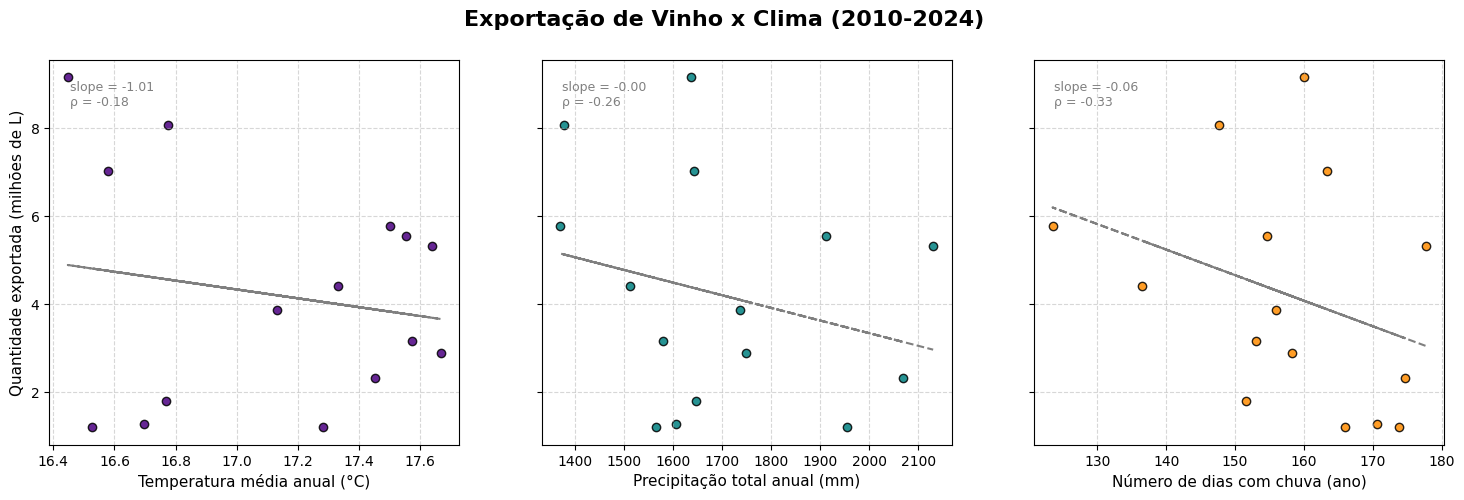

In [ ]:
#pq quase n aparece correla√ß√µes aqui?
#Exporta√ß√£o anual √© uma √∫nica s√©rie; quando replico esse mesmo n√∫mero para Bag√©, Bento e Vacaria a cada ano, 
#matematicamente o valor de exporta√ß√£o √© id√™ntico nas tr√™s linhas daquele ano.

#O coeficiente de correla√ß√£o de Pearson sente apenas ‚Äúse as curvas sobem ou descem juntas‚Äù; 
#duplicar valores n√£o cria varia√ß√£o nova -> correla√ß√£o fica a mesma da m√©dia estadual (aprox. 0).

#Mesmo sem duplicar, produ√ß√£o -> exporta√ß√£o n√£o √© instant√¢nea; clima afeta safra (t-0), 
#o vinho √© elaborado e costuma ser exportado no ano seguinte (t + 1).

#O horizonte 2010-2024 oferece 15 pontos por esta√ß√£o; estatisticamente √© muito curto para rela√ß√µes fracas.




#como fazer agora, ent√£o?

#0) fazer o macro, porque at√© agora eu tinha investigado no micro apenas

#1) usar lag (t-1) -> correlacionar clima do ano anterior com exporta√ß√£o atual.

#2) pegar dados da produ√ß√£o (safra) -> no site da vitibrasil tem as informa√ß√µes de produ√ß√£o, se n√£o me engano. 
#Posso pegar esses dados (se essa bosta de site deles funcionar pq toda hora ta off)

#3) usar modelo multivariado simples -> uma regress√£o linear ou √°rvore de decis√£o pode captar 
#combina√ß√£o de chuva + temperatura mesmo com amostra pequena, melhor que correla√ß√£o par-a-par

#4) ver anomalias visuais -> gr√°ficos :) (scatter ou linha dupla e tal, pra ver se tem algum ano an√¥malo e etc.)




#vamos l√°:

from scipy.stats import pearsonr


#agrupando os valores de anos iguais em blocos separados para ter o total exportado de cada ano.
vinhos_total = vinhos.groupby('Ano', as_index=False)['Quantidade_L'].sum()

#fazendo a media das 3 estacoes pra ter uma no√ß√£o mais macro do RS
clima_rs = (
    clima_anualgeral
      .groupby('Ano', as_index=False)[['TempMedia','PrecipTotal','DiasChuva']]
      .mean()
)

#juntando os dfs
vinho_clima_rs = pd.merge(vinhos_total, clima_rs, on='Ano')

#plotando
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle('Exporta√ß√£o de Vinho x Clima (2010-2024)', fontsize=16, fontweight='bold')

pares = [
    ('TempMedia',   'Temperatura m√©dia anual (¬∞C)',      'indigo'),
    ('PrecipTotal', 'Precipita√ß√£o total anual (mm)',     'teal'),
    ('DiasChuva',   'N√∫mero de dias com chuva (ano)',    'darkorange')
]

for ax, (c, label, color) in zip(axs, pares):
    y = vinho_clima_rs['Quantidade_L'] / 1e6         
    x = vinho_clima_rs[c]
    ax.scatter(x, y, color=color, alpha=0.85, edgecolor='k')
    
    #‚ÄÉreta de tend√™ncia (ordem 1)
    slope, intercept = np.polyfit(x, y, 1)
    ax.plot(x, slope * x + intercept, ls='--', color='gray')

    #correla√ß√£o de Pearson
    r, p = pearsonr(x, y)

    #exibe no console
    print(f'{label}: slope = {slope:.4f} | œÅ = {r:.2f} | p = {p:.3f}')

    #anota no gr√°fico
    ax.annotate(f'slope = {slope:.2f}\nœÅ = {r:.2f}',
                xy=(0.05, 0.88), xycoords='axes fraction',
                fontsize=9, color='gray')

    ax.set_xlabel(label, fontsize=11)
    ax.grid(ls='--', alpha=0.5)


axs[0].set_ylabel('Quantidade exportada (milh√µes de L)', fontsize=11)
axs[0].yaxis.set_major_locator(ticker.MultipleLocator(2))
axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda v, _ : f'{v:,.0f}'))


plt.show()





In [34]:
#√† primeira vista parece n√£o ter rela√ß√£o alguma... At√© essa linha de regress√£o ("Linha tend√™ncia") t√° totalmente maluca
#vou gerar os dados tipo slope e tal pra sair de informa√ß√£o tb 
#lembrando: slope √© a inclina√ß√£o da reta, rho (œÅ) √© o coeficiente de correla√ß√£o de pearson e p (p-value, associado ao œÅ) serve
#para testar a signific√¢ncia estat√≠stica de œÅ.   
#valores que s√£o relevantes:  


#For√ßa da correla√ß√£o para |œÅ|
# Desprez√≠vel 0.00 ‚Äì 0.19 
# Fraca 0.20 ‚Äì 0.39
# Moderada 0.40 ‚Äì 0.59 
# Forte 0.60 ‚Äì 0.79 
# Muito forte 0.80 ‚Äì 1.00

#esses intervalos s√£o emp√≠ricos (Cohen). 
#vou considerar |œÅ| ‚â• 0.3 digno de nota e ‚â• 0.5 realmente relevante.

#j√° para o p-value, ele precisa ser < 0.05 para que a correla√ß√£o observada seja estat√≠sticamente significativa.
#de 0.05 at√© 0.10, √© marginal -> sugere tend√™ncia, mas sem conclus√£o firme.
#acima disso n√£o h√° evid√™ncia estat√≠stica de correla√ß√£o.


#temos os resultados:
#Temperatura m√©dia anual (¬∞C): slope = -1.0052 | œÅ = -0.18 | p = 0.530
#Precipita√ß√£o total anual (mm): slope = -0.0029 | œÅ = -0.26 | p = 0.355
#N√∫mero de dias com chuva (ano): slope = -0.0580 | œÅ = -0.33 | p = 0.226

#ou seja: como œÅ e p mostram, os dados do clima n√£o t√™m rela√ß√£o estat√≠stica real com 
#as exporta√ß√µes dos vinhos. No m√°ximo, o num de dias com chuva por ano, que tem um œÅ 
#que se enquadra no "fraco", mas o p-value √© alto, ent√£o n√£o rejeita a hip√≥tese de correla√ß√£o zero.

#obs. importante: o valor de coeficiente de pearson que encontrei antes (mais acima do c√≥digo) √© bem mais baixo do que o que 
#eu encontrei agora aqui com o scipy. Provavelmente √© porque o df que tava sendo usado antes para encontrar esses coeficientes
#tava muito polu√≠do e isso devia estar influenciando no resultado de rho (no pearsonr(x, y) eu usei vinho_clima_rs [j√° agregado 
# por ano] -> 15 pontos. J√° .corr() passa por vinhos_clima e avalia centenas de linhas [Pa√≠s-Ano-Esta√ß√£o], da√≠ pode interferir no valor de rho)

#para o relat√≥rio:
#Nas s√©ries 2010-2024, a precipita√ß√£o e n√∫mero de dias chuvosos mostram correla√ß√£o negativa fraca (œÅ ‚âà ‚Äì0.26 a ‚Äì0.33) 
#com o volume exportado, mas n√£o atingem signific√¢ncia estat√≠stica ao n√≠vel de 5 %. Isso sugere tend√™ncia, 
#por√©m outros fatores parecem dominar.





In [ ]:
#testando pra ver se era de fato o conjunto de dados que tava interferindo no valor de rho:
subset = vinho_clima_rs[['TempMedia', 'Quantidade_L']].dropna()

rho_numpy  = np.corrcoef(subset['TempMedia'], subset['Quantidade_L'])[0, 1]
rho_pandas = subset['TempMedia'].corr(subset['Quantidade_L'])

print('œÅ_numpy =', rho_numpy,'| œÅ_pandas =', rho_pandas) #devem ser iguais :)

#receba, o que eu falei ta certo ent√£o

  œÅ_numpy = -0.1760071511524577 | œÅ_pandas = -0.1760071511524577


--- Correla√ß√µes (œÅ) ‚Äî clima lag-1 x exporta√ß√£o ---
TempMedia_l1        œÅ = +0.15   |   slope = +0.840 (Mi L / unidade)
PrecipTotal_l1      œÅ = -0.69   |   slope = -0.009 (Mi L / unidade)
DiasChuva_l1        œÅ = -0.83   |   slope = -0.148 (Mi L / unidade)


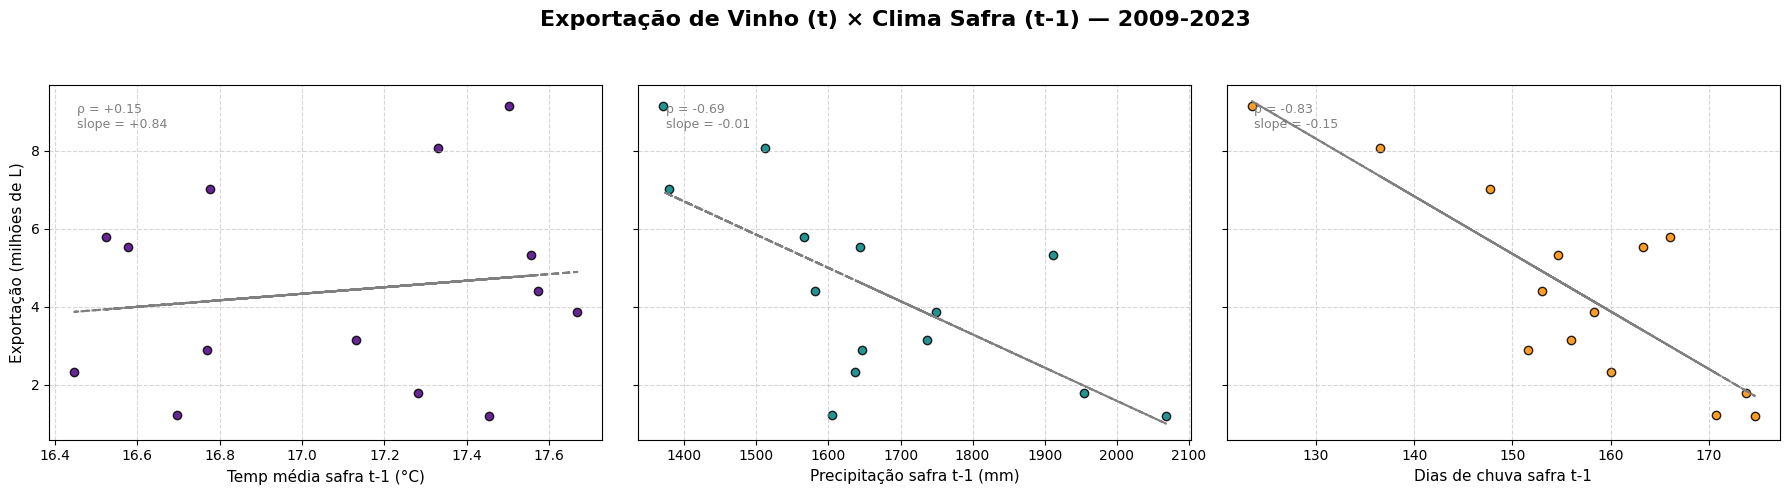

In [40]:
#Como a correla√ß√£o n ta sendo muito relevante assim, vamos tentar aplicar o lag, pra ver se ajuda nisso.

clima_lag1 = clima_rs.copy()
clima_lag1['Ano'] += 1
clima_lag1 = clima_lag1.rename(columns={
    'TempMedia'  : 'TempMedia_l1',
    'PrecipTotal': 'PrecipTotal_l1',
    'DiasChuva'  : 'DiasChuva_l1'
})

df_lag = pd.merge(vinhos_total, clima_lag1, on='Ano', how='inner') #merge


#correla√ß√µes e tal

vars_lag  = ['TempMedia_l1', 'PrecipTotal_l1', 'DiasChuva_l1']
y_mil     = df_lag['Quantidade_L'] / 1e6           # milh√µes de L

print('--- Correla√ß√µes (œÅ) ‚Äî clima lag-1 x exporta√ß√£o ---')
for var in vars_lag:
    rho = np.corrcoef(df_lag[var], y_mil)[0, 1]
    slope, _ = np.polyfit(df_lag[var], y_mil, 1)
    print(f'{var:<18}  œÅ = {rho:+.2f}   |   slope = {slope:+.3f} (Mi L / unidade)')


#plots com linha de tendencia

fig, axs = plt.subplots(1, 3, figsize=(18,5), sharey=True)
fig.suptitle('Exporta√ß√£o de Vinho (t) √ó Clima Safra (t-1) ‚Äî 2009-2023',
             fontsize=16, fontweight='bold')

pairs = [
    ('TempMedia_l1',   'Temp m√©dia safra t-1 (¬∞C)',        'indigo'),
    ('PrecipTotal_l1', 'Precipita√ß√£o safra t-1 (mm)',      'teal'),
    ('DiasChuva_l1',   'Dias de chuva safra t-1',          'darkorange')
]

for ax, (col, xlab, color) in zip(axs, pairs):
    x = df_lag[col]
    ax.scatter(x, y_mil, color=color, edgecolor='k', alpha=0.85)
    
    #linha de tend√™ncia
    slope, intercept = np.polyfit(x, y_mil, 1)
    ax.plot(x, slope*x + intercept, ls='--', color='gray')
    
    #œÅ
    rho = np.corrcoef(x, y_mil)[0, 1]
    ax.annotate(f'œÅ = {rho:+.2f}\nslope = {slope:+.2f}',
                xy=(0.05, 0.88), xycoords='axes fraction',
                fontsize=9, color='gray')
    
    ax.set_xlabel(xlab, fontsize=11)
    ax.grid(ls='--', alpha=0.5)

axs[0].set_ylabel('Exporta√ß√£o (milh√µes de L)', fontsize=11)
axs[0].yaxis.set_major_locator(ticker.MultipleLocator(2))
axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda v, _ : f'{v:,.0f}'))

plt.tight_layout(rect=[0,0,1,0.93])
plt.show()

In [ ]:
#olhar outlier poss√≠vel em 2016/2015